In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import precision_score, recall_score

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Google Drive'da veri setimin  bulunduğu ana dizin
data_dir = '/content/drive/My Drive/dataset'

In [ ]:
# Veri artırma için ImageDataGenerator kullanma
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Train ve validation verisi için veri yükleyici oluşturma
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'training_set'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Train verisi
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'training_set'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Validation verisi
)


Found 8010 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
# Model oluşturma
input_layer = Input(shape=(150, 150, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

In [ ]:
# Erken durdurma (EarlyStopping) ve Model Kontrol Noktası (ModelCheckpoint) geri çağrıları
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

In [ ]:
# Modeli eğitme
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
251/251 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.4953 - precision: 0.4914 - recall: 0.3063

251/251 [==============================] - 2134s 8s/step - loss: 0.6941 - accuracy: 0.4953 - precision: 0.4914 - recall: 0.3063
Epoch 2/30
251/251 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.5001 - precision: 0.4995 - recall: 0.5477

251/251 [==============================] - 69s 275ms/step - loss: 0.6937 - accuracy: 0.5001 - precision: 0.4995 - recall: 0.5477
Epoch 3/30
251/251 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4980 - precision: 0.4964 - recall: 0.3640

251/251 [==============================] - 69s 273ms/step - loss: 0.6938 - accuracy: 0.4980 - precision: 0.4964 - recall: 0.3640
Epoch 4/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4993 - precision: 0.4986 - recall: 0.5030

251/251 [==============================] - 68s 271ms/step - loss: 0.6932 - accuracy: 0.4993 - precision: 0.4986 - recall: 0.5030
Epoch 5/30
251/251 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.4955 - precision: 0.4947 - recall: 0.4827

251/251 [==============================] - 67s 267ms/step - loss: 0.6936 - accuracy: 0.4955 - precision: 0.4947 - recall: 0.4827
Epoch 6/30
251/251 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4889 - precision: 0.4850 - recall: 0.3808

251/251 [==============================] - 67s 266ms/step - loss: 0.6937 - accuracy: 0.4889 - precision: 0.4850 - recall: 0.3808
Epoch 7/30
251/251 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5009 - precision: 0.5002 - recall: 0.6223

251/251 [==============================] - 68s 272ms/step - loss: 0.6935 - accuracy: 0.5009 - precision: 0.5002 - recall: 0.6223
Epoch 8/30
251/251 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5002 - precision: 0.4997 - recall: 0.5633

251/251 [==============================] - 67s 267ms/step - loss: 0.6934 - accuracy: 0.5002 - precision: 0.4997 - recall: 0.5633
Epoch 9/30
251/251 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4951 - precision: 0.4924 - recall: 0.3557

251/251 [==============================] - 69s 274ms/step - loss: 0.6935 - accuracy: 0.4951 - precision: 0.4924 - recall: 0.3557
Epoch 10/30
251/251 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5029 - precision: 0.5028 - recall: 0.3980

251/251 [==============================] - 67s 267ms/step - loss: 0.6934 - accuracy: 0.5029 - precision: 0.5028 - recall: 0.3980
Epoch 11/30
251/251 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.4899 - precision: 0.4822 - recall: 0.2905

251/251 [==============================] - 69s 276ms/step - loss: 0.6934 - accuracy: 0.4899 - precision: 0.4822 - recall: 0.2905
Epoch 12/30
251/251 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4971 - precision: 0.4928 - recall: 0.2410

251/251 [==============================] - 67s 265ms/step - loss: 0.6933 - accuracy: 0.4971 - precision: 0.4928 - recall: 0.2410
Epoch 13/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5002 - precision: 0.4997 - recall: 0.6783

251/251 [==============================] - 66s 265ms/step - loss: 0.6932 - accuracy: 0.5002 - precision: 0.4997 - recall: 0.6783
Epoch 14/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5004 - precision: 0.4995 - recall: 0.2663

251/251 [==============================] - 69s 274ms/step - loss: 0.6932 - accuracy: 0.5004 - precision: 0.4995 - recall: 0.2663
Epoch 15/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5006 - precision: 0.5000 - recall: 0.7268

251/251 [==============================] - 66s 265ms/step - loss: 0.6932 - accuracy: 0.5006 - precision: 0.5000 - recall: 0.7268
Epoch 16/30
251/251 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4983 - precision: 0.4914 - recall: 0.1360

251/251 [==============================] - 68s 269ms/step - loss: 0.6933 - accuracy: 0.4983 - precision: 0.4914 - recall: 0.1360
Epoch 17/30
251/251 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5001 - precision: 0.4994 - recall: 0.4240

251/251 [==============================] - 67s 265ms/step - loss: 0.6933 - accuracy: 0.5001 - precision: 0.4994 - recall: 0.4240
Epoch 18/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5024 - precision: 0.5014 - recall: 0.6275

251/251 [==============================] - 68s 271ms/step - loss: 0.6932 - accuracy: 0.5024 - precision: 0.5014 - recall: 0.6275
Epoch 19/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5054 - precision: 0.5047 - recall: 0.5088

251/251 [==============================] - 67s 266ms/step - loss: 0.6932 - accuracy: 0.5054 - precision: 0.5047 - recall: 0.5088
Epoch 20/30
251/251 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5015 - precision: 0.5017 - recall: 0.2630

251/251 [==============================] - 68s 272ms/step - loss: 0.6933 - accuracy: 0.5015 - precision: 0.5017 - recall: 0.2630
Epoch 21/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5034 - precision: 0.5023 - recall: 0.5972

251/251 [==============================] - 67s 265ms/step - loss: 0.6932 - accuracy: 0.5034 - precision: 0.5023 - recall: 0.5972
Epoch 22/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5035 - precision: 0.5022 - recall: 0.6442

251/251 [==============================] - 67s 265ms/step - loss: 0.6932 - accuracy: 0.5035 - precision: 0.5022 - recall: 0.6442
Epoch 23/30
251/251 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4956 - precision: 0.4922 - recall: 0.3158

251/251 [==============================] - 68s 271ms/step - loss: 0.6933 - accuracy: 0.4956 - precision: 0.4922 - recall: 0.3158
Epoch 24/30
251/251 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5055 - precision: 0.5051 - recall: 0.4785

251/251 [==============================] - 66s 262ms/step - loss: 0.6931 - accuracy: 0.5055 - precision: 0.5051 - recall: 0.4785
Epoch 25/30
251/251 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.4908 - precision: 0.4904 - recall: 0.5045

251/251 [==============================] - 67s 269ms/step - loss: 0.6934 - accuracy: 0.4908 - precision: 0.4904 - recall: 0.5045
Epoch 26/30
251/251 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5011 - precision: 0.5005 - recall: 0.5455

251/251 [==============================] - 66s 262ms/step - loss: 0.6933 - accuracy: 0.5011 - precision: 0.5005 - recall: 0.5455
Epoch 27/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5025 - precision: 0.5029 - recall: 0.3277

251/251 [==============================] - 69s 273ms/step - loss: 0.6932 - accuracy: 0.5025 - precision: 0.5029 - recall: 0.3277
Epoch 28/30
251/251 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4973 - precision: 0.4927 - recall: 0.2288

251/251 [==============================] - 66s 262ms/step - loss: 0.6933 - accuracy: 0.4973 - precision: 0.4927 - recall: 0.2288
Epoch 29/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4946 - precision: 0.4939 - recall: 0.4837

251/251 [==============================] - 66s 262ms/step - loss: 0.6932 - accuracy: 0.4946 - precision: 0.4939 - recall: 0.4837
Epoch 30/30
251/251 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4965 - precision: 0.4937 - recall: 0.3250

251/251 [==============================] - 68s 270ms/step - loss: 0.6932 - accuracy: 0.4965 - precision: 0.4937 - recall: 0.3250


In [ ]:
# Eğitim sonuçlarını saklama
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
validation_accuracy = history.history['accuracy']
validation_loss = history.history['loss']
validation_precision = history.history['precision']
validation_recall = history.history['recall']

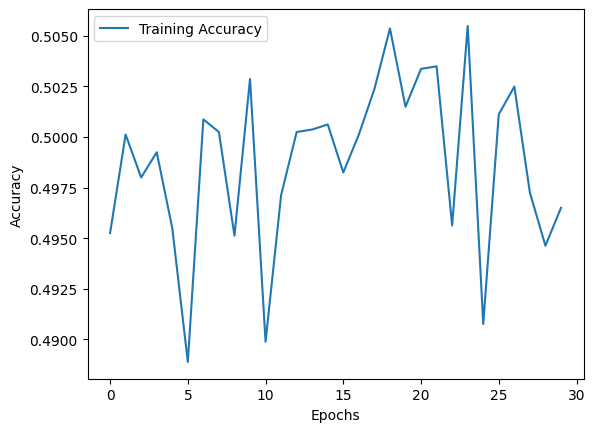

In [ ]:
# Eğitim sonuçlarını görselleştirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test verisi için veri yükleyici oluşturma
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test_set'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # İkili sınıflandırma
)

Found 2000 images belonging to 2 classes.


In [ ]:
# Modelin test verisi üzerinde performansını ölçme
test_metrics = model.evaluate(test_generator, return_dict=True)
print("Test Metrics:", test_metrics)


63/63 [==============================] - 11s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Metrics: {'loss': 0.6931527256965637, 'accuracy': 0.5, 'precision': 0.0, 'recall': 0.0}


In [ ]:
# Precision ve Recall hesaplamaları
test_predictions = model.predict(test_generator)
test_predictions_binary = (test_predictions > 0.5).astype(int)
true_labels = test_generator.classes

precision = precision_score(true_labels, test_predictions_binary)
recall = recall_score(true_labels, test_predictions_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

63/63 [==============================] - 11s 173ms/step
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Test verisi için veri yükleyici oluşturma
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test_set'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # İkili sınıflandırma
)

Found 2000 images belonging to 2 classes.


In [ ]:
# Test verisi üzerinde tahminler yapma
predictions = model.predict(test_generator)

63/63 [==============================] - 7s 105ms/step


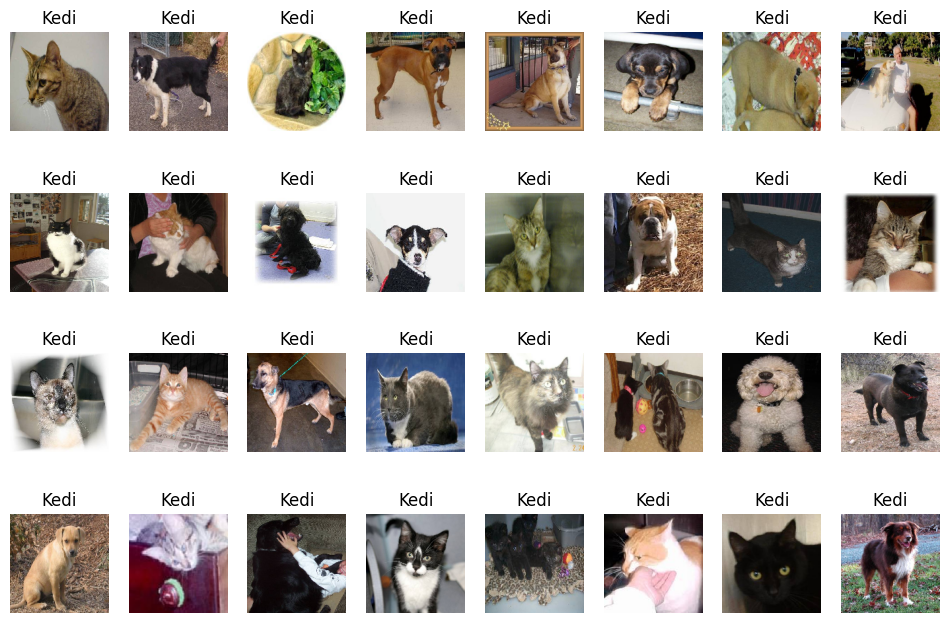

In [ ]:
# Test verisi üzerinde tahmin sonuçlarını görselleştirme
plt.figure(figsize=(12, 8))

for i in range(len(predictions)):
    if i >= 32:
        break

    plt.subplot(4, 8, i + 1)
    plt.imshow(test_generator[i][0][0])
    plt.axis('off')

    if predictions[i] >= 0.5:
        plt.title("Köpek")
    else:
        plt.title("Kedi")

plt.show()